In [1]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
def summary_BMS_result(filename, summaryfile):
    with open(filename) as infile:
        counts = collections.Counter(l.strip() for l in infile)
    with open(summaryfile, 'w') as f:
        for key, value in counts.items(): 
            f.write('%s, %s\n' % (key, value))

In [36]:
def count_parameter(row):
    sym_eqn = row['Model']
    count = 0
    for param in ['_a0_','_a1_','_a2_','_a3_',]:
        if param in sym_eqn:
            count += 1
    return count

data = []
for i in range(6):
    directory = './Results/20220412_EXP1/NoData_NoTC_OldCanCheck/complexity_penalty_' + str(i)
    data_file = glob.glob(directory +'/All_Models*')
    summary_BMS_result(data_file[0], (directory +'/summary.txt'))

    # Data visualisation
    data.append(pd.read_csv((directory + '/summary.txt'), delimiter=','))
    data[i] = data[i].rename(columns={' 1':'Frequency of the model'})
    data[i]['Total param'] = data[i].apply(lambda row: count_parameter(row), axis=1)


In [37]:
#data[0].apply(lambda row: count_parameter(row), axis=1)
data[0].head()

,Model,Canonical form,Total num ops,Description length,EB,EP,TC Bool,Axiom,_a0_,_a1_,_a2_,_a3_,Frequency of the model,Total param
0,-(_a3_),-c1,1,0.0,0.0,0.0,[],NaN,1.0,1.0,1.0,1.0,1,1
1,-((_a2_ * _a0_)),-c1*c2,2,0.0,0.0,0.0,[],NaN,1.0,1.0,1.0,1.0,1,2
2,((_a2_ * _a0_) ** 2),c1**2*c2**2,2,0.0,0.0,0.0,[],NaN,1.0,1.0,1.0,1.0,1,2
3,((_a2_ + _a0_) ** 2),(c1+c2)**2,2,0.0,0.0,0.0,[],NaN,1.0,1.0,1.0,1.0,1,2
4,((sqrt(_a0_) + _a0_) ** 2),(sqrt(c1)+c1)**2,3,0.0,0.0,0.0,[],NaN,1.0,1.0,1.0,1.0,1,1


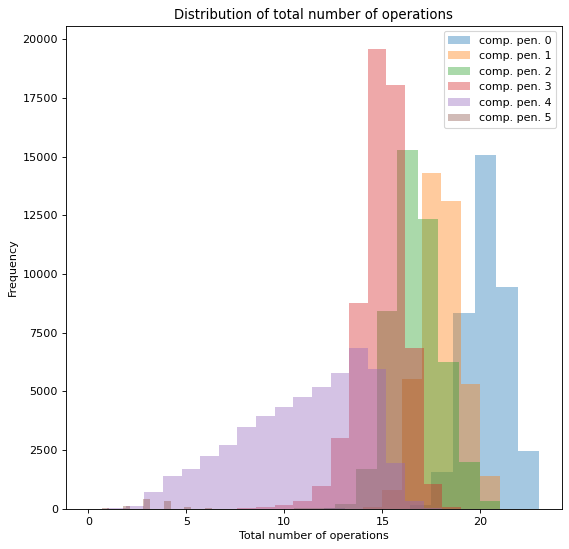

In [47]:
plt.figure(figsize=(8,8), dpi=80)
for i in range(6):
    plt.hist(data[i]['Total num ops'], bins=20, alpha=0.4, label='comp. pen. '+str(i))
plt.legend()
plt.title('Distribution of total number of operations')
plt.xlabel('Total number of operations')
plt.ylabel('Frequency')
plt.savefig('dist_total_num_ops.jpeg',dpi=300)
plt.show()

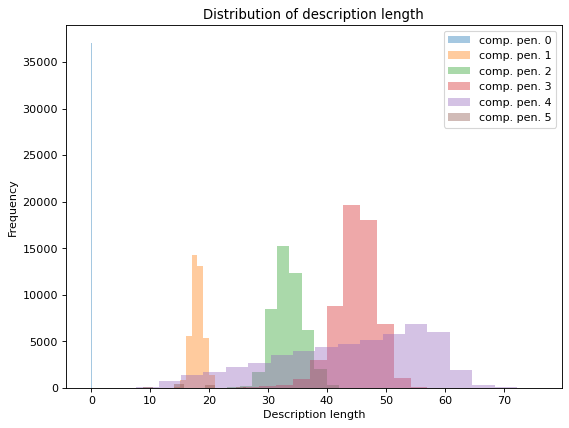

In [48]:
plt.figure(figsize=(8,6), dpi=80)
for i in range(6):
    plt.hist(data[i]['Description length'], bins=20, alpha=0.4, label='comp. pen. '+str(i))
plt.legend()
plt.title('Distribution of description length')
plt.xlabel('Description length')
plt.ylabel('Frequency')
plt.savefig('dist_description_length.jpeg',dpi=300)
plt.show()


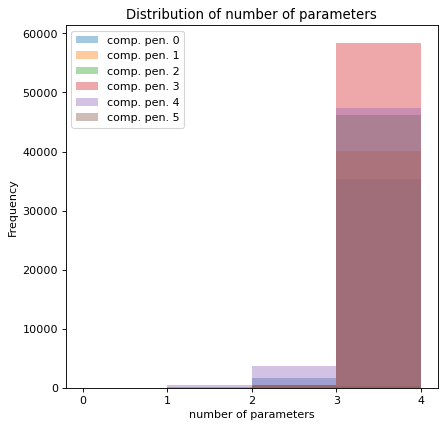

In [49]:
plt.figure(figsize=(6,6), dpi=80)
for i in range(6):
    plt.hist(data[i]['Total param'], bins=[0,1,2,3,4], alpha=0.4, label='comp. pen. '+str(i))
plt.legend()
plt.title('Distribution of number of parameters')
plt.xlabel('number of parameters')
plt.xticks([0,1,2,3,4])
plt.ylabel('Frequency')
plt.savefig('number of parameters.jpeg',dpi=300)
plt.show()
